# Descriptive Statistics for Quantitative Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", 99)

### 1. Quantitative Data

In [3]:
iris = pd.read_csv("Iris.csv")
print(iris.head())

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width Species
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


### 2. Numerical Summary

In [4]:
print(iris.describe())

       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [5]:
print(iris.groupby("Species").describe())

            Petal_Length                                               \
                   count   mean       std  min  25%   50%    75%  max   
Species                                                                 
Setosa              50.0  1.464  0.173511  1.0  1.4  1.50  1.575  1.9   
Versicolour         50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
Virginica           50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

            Petal_Width                                            \
                  count   mean       std  min  25%  50%  75%  max   
Species                                                             
Setosa             50.0  0.244  0.107210  0.1  0.2  0.2  0.3  0.6   
Versicolour        50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8   
Virginica          50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5   

            Sepal_Length                                              \
                   count   mean       std  min    25%  50%  75%  max   
Sp

### 2.1. Center

In [6]:
## Mean
print(iris.mean())

Sepal_Length    5.843333
Sepal_Width     3.054000
Petal_Length    3.758667
Petal_Width     1.198667
dtype: float64


In [7]:
## Median
print(iris.median())

Sepal_Length    5.80
Sepal_Width     3.00
Petal_Length    4.35
Petal_Width     1.30
dtype: float64


### 2.2. Variability

In [8]:
## Variance
print(iris.var())

Sepal_Length    0.685694
Sepal_Width     0.188004
Petal_Length    3.113179
Petal_Width     0.582414
dtype: float64


In [9]:
## Standard Deviation
print(iris.std())

Sepal_Length    0.828066
Sepal_Width     0.433594
Petal_Length    1.764420
Petal_Width     0.763161
dtype: float64


In [10]:
## Coefficient of Variation
print((iris.std()/iris.mean())*100)

Sepal_Length    14.171126
Sepal_Width     14.197587
Petal_Length    46.942721
Petal_Width     63.667470
dtype: float64


In [11]:
## Range
print(iris.quantile(1)-iris.quantile(0))

Sepal_Length    3.6
Sepal_Width     2.4
Petal_Length    5.9
Petal_Width     2.4
dtype: float64


In [12]:
## Interquartile Range
print(iris.quantile(0.75)-iris.quantile(0.25))

Sepal_Length    1.3
Sepal_Width     0.5
Petal_Length    3.5
Petal_Width     1.5
dtype: float64


### 2.3. Shape

In [13]:
## Skewness
print(iris.skew())

Sepal_Length    0.314911
Sepal_Width     0.334053
Petal_Length   -0.274464
Petal_Width    -0.104997
dtype: float64


In [14]:
## Kurtosis
print(iris.kurt())

Sepal_Length   -0.552064
Sepal_Width     0.290781
Petal_Length   -1.401921
Petal_Width    -1.339754
dtype: float64


### 3. Graphical Summary

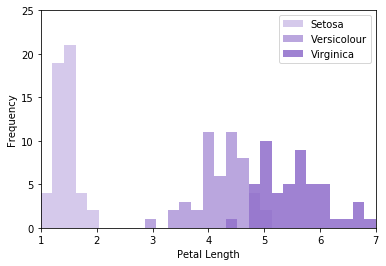

In [15]:
bins = np.linspace(1, 7, 30)
iris[iris["Species"]=="Setosa"].Petal_Length.hist(bins=bins, color="#D1C4E9", alpha=0.9)
iris[iris["Species"]=="Versicolour"].Petal_Length.hist(bins=bins, color="#B39DDB", alpha=0.9)
iris[iris["Species"]=="Virginica"].Petal_Length.hist(bins=bins, color="#9575CD", alpha=0.9)
plt.xlim(1, 7); plt.ylim(0, 25); plt.xlabel("Petal Length"); plt.ylabel("Frequency")
plt.legend(["Setosa", "Versicolour", "Virginica"]); plt.grid(False); plt.show()

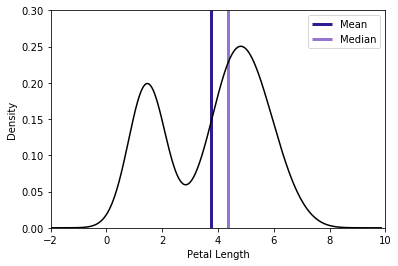

In [16]:
iris["Petal_Length"].plot(kind="density",
                          xlim=(-2, 10), ylim=(0, 0.3), color="#000000", label="")
plt.vlines(iris["Petal_Length"].mean(),
           ymin=0, ymax=0.3, linewidth=3, color="#311B92", label="Mean")
plt.vlines(iris["Petal_Length"].median(),
           ymin=0, ymax=0.3, linewidth=3, color="#9575CD", label="Median")
plt.xlabel("Petal Length"); plt.ylabel("Density"); plt.legend(); plt.show()

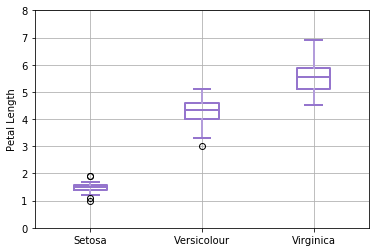

In [17]:
lines = {"linewidth":2}
colors = {"boxes":"#9575CD", "whiskers":"#B39DDB", "medians":"#9575CD", "caps":"#9575CD"}
iris.reset_index().pivot("index", "Species", "Petal_Length").plot.box(vert=True,
                                                                      boxprops=lines,
                                                                      whiskerprops=lines,
                                                                      medianprops=lines,
                                                                      capprops=lines,
                                                                      color=colors)
plt.ylim(0, 8); plt.ylabel("Petal Length"); plt.grid(True); plt.show()